In [ ]:
#Download necessary packages if right kernel is not present
!pip install pandas
!pip install scikit-learn
!pip install matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

## Randomforest classifier on remote sensing images
### In this tasks, we will use a small sample of dataset from [SAT-6](https://csc.lsu.edu/~saikat/deepsat/).
   - In this task, we only used test dataset, which consists of 81000 samples randomly distributed across 6 classes
   - We used 1000 $\times$  6 samples for training and and 100 $\times$ 6 for testing
   - We have uploaded the data in this B2share link [link](https://b2share.eudat.eu/records/89654eac10724d30a6c7e51f2c5422de). Download all the files at the same folder path where you are creating this notebook

#### Alternatively use the wget commands to downlaod the data

In [2]:
!wget https://b2share.eudat.eu/api/files/a697daf7-7570-44ff-854c-0fab43f2b52c/X_test_sat6.csv
!wget https://b2share.eudat.eu/api/files/a697daf7-7570-44ff-854c-0fab43f2b52c/y_test_sat6.csv
!wget https://b2share.eudat.eu/api/files/a697daf7-7570-44ff-854c-0fab43f2b52c/sat6annotations.csv

--2025-02-04 11:52:57--  https://b2share.eudat.eu/api/files/a697daf7-7570-44ff-854c-0fab43f2b52c/X_test_sat6.csv
Resolving b2share.eudat.eu (b2share.eudat.eu)... 86.50.166.97
connected. to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.97|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 905628829 (864M) [text/plain]
Saving to: ‘X_test_sat6.csv’

X_test_sat6.csv      35%[======>             ] 304.41M  1.48MB/s    in 3m 13s  

2025-02-04 11:56:11 (1.58 MB/s) - Connection closed at byte 319195176. Retrying.

--2025-02-04 11:56:12--  (try: 2)  https://b2share.eudat.eu/api/files/a697daf7-7570-44ff-854c-0fab43f2b52c/X_test_sat6.csv
connected. to b2share.eudat.eu (b2share.eudat.eu)|86.50.166.97|:443... 
HTTP request sent, awaiting response... 200 OK
Length: 905628829 (864M) [text/plain]
Saving to: ‘X_test_sat6.csv’

X_test_sat6.csv     100%[===================>] 863.67M  1.26MB/s    in 14m 1s  

2025-02-04 12:10:14 (1.03 MB/s) - ‘X_test_sat6.csv’ saved [905628829/905628829]

--2

In [3]:
# load the csv file for data. Each row belongs to sample. Each sample has 3136 columns i.e. 4 channels (R,G,B, and NIR) and 28 \times 28 spatial size
train_df = pd.read_csv("./X_test_sat6.csv",header=None)

In [4]:
# load the csv file for all samples
labels_train_df = pd.read_csv("./y_test_sat6.csv",header=None)

In [5]:
#print the dataframe
train_df

,0,1,2,3,4,5,6,7,8,9,...,3126,3127,3128,3129,3130,3131,3132,3133,3134,3135
0,95,91,61,157,105,113,101,179,50,35,...,107,181,118,137,127,205,90,105,86,183
1,102,102,103,137,108,110,116,154,88,83,...,91,157,95,92,84,143,89,85,76,130
2,47,54,95,10,79,89,108,15,96,131,...,118,17,82,98,125,18,61,69,113,13
3,200,181,178,218,192,177,176,214,162,141,...,139,203,157,138,125,193,147,128,107,187
4,85,101,100,15,87,102,97,16,54,71,...,74,8,37,49,76,6,27,43,69,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80995,82,82,115,17,104,123,131,23,100,119,...,146,32,137,152,159,44,159,166,166,61
80996,170,148,147,174,203,188,163,190,211,197,...,134,172,163,154,136,175,172,157,143,177
80997,140,136,126,190,156,163,152,208,152,170,...,126,162,93,111,119,170,68,66,61,123
80998,89,87,99,13,64,66,89,9,16,26,...,111,15,49,52,97,11,47,56,102,9


In [9]:
column_vals = labels_train_df.columns.values

### Collect equal number of samples i.e. 1100 from each class

In [11]:
label_indices = []
for column_val in column_vals:
    boolean = labels_train_df[column_val] == 1
    label_indices.append([(np.where(boolean.values)[0][:1100])])
    
valid_labels = []
for label in label_indices:
    valid_labels.extend((*label))

In [12]:
# Collect samples from the selected indices and labels
valid_samples = train_df.iloc[valid_labels]

In [13]:
# Read the annotation file to get the annotation i.e. classname corrsponidng to the labels
annotation_csv = pd.read_csv("./sat6annotations.csv", header=None)

In [14]:
labels = annotation_csv[0].values

In [15]:
labels

array(['building', 'barren_land', 'trees', 'grassland', 'road', 'water'],
      dtype=object)

# Plotting of random_samples

In [35]:
num_samples_from_each_class = 1100
random_val = np.random.randint(0,num_samples_from_each_class,size=(8,))
val_indices = []
for i in range(6):
    val_indices.append(random_val + num_samples_from_each_class*i)
val_indices = np.concatenate(val_indices,axis=0)
data = np.reshape(valid_samples.iloc[val_indices].values,(-1,28,28,4))

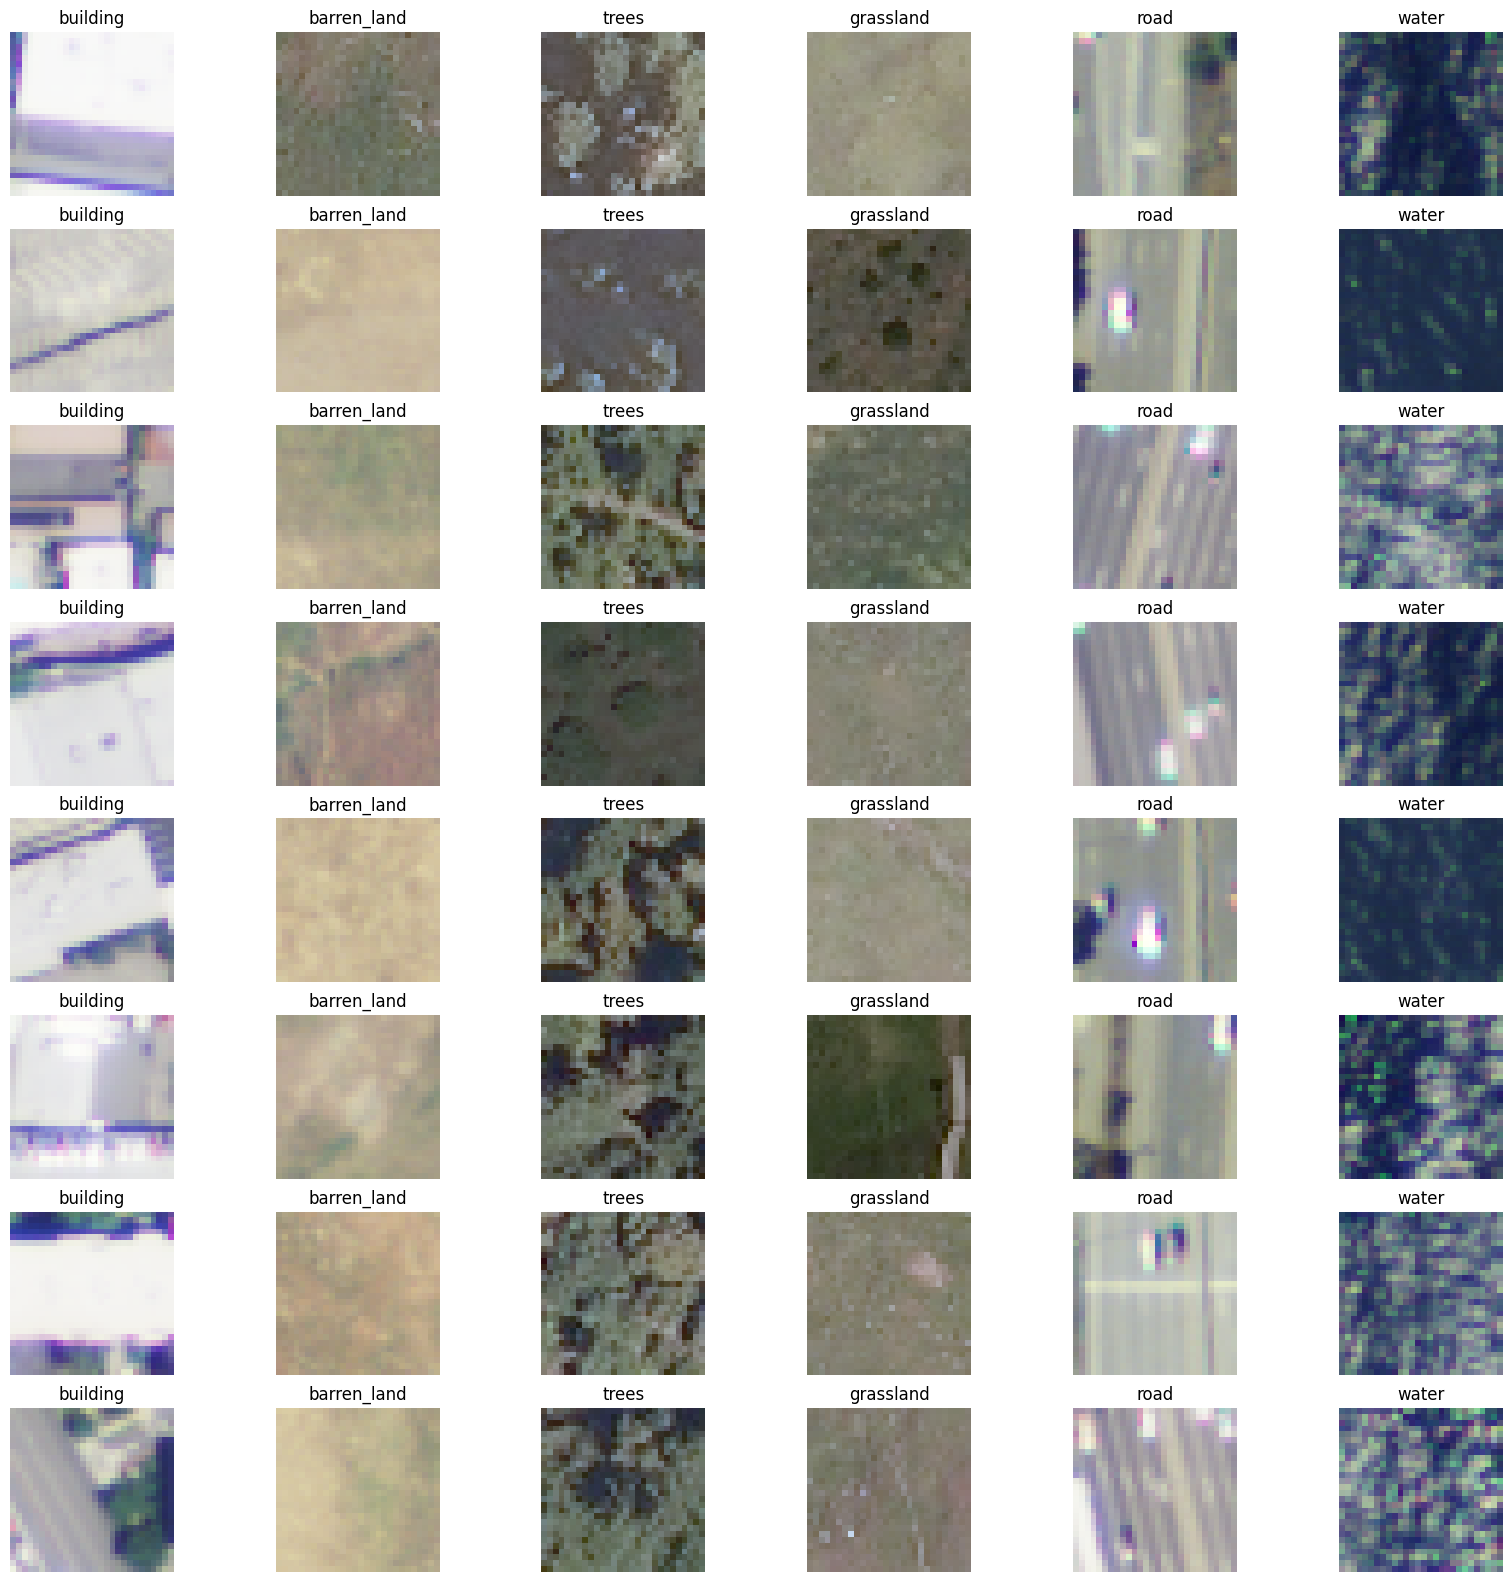

In [36]:
fig, ax = plt.subplots(8,6, figsize=(20,20))
for i in range(8):
    for j in range(6):
        data_index = i + j*8
        ax[i,j].set_title(f"{labels[val_indices[data_index]//num_samples_from_each_class]}")
        ax[i,j].axis('off')
        ax[i,j].imshow(data[data_index,:,:,:3])


### Do splitting from filtered indices
    - In our examples total number of training samples = 1000 validation samples = 100 for each class

In [40]:
num_train_samples_per_class = 1000
num_validation_samples_per_class = 100

assert num_samples_from_each_class == num_train_samples_per_class + num_validation_samples_per_class, "mismatch with total_samples with split samples provided" 

In [18]:
# train_dataset
train_x, test_x, train_y, test_y = [], [] , [], []
for i in range(6):
    train_x.append(label_indices[i][0][:num_train_samples_per_class])
    test_x.append(label_indices[i][0][num_train_samples_per_class:num_samples_from_each_class])
    train_y.append(np.ones(shape=(num_train_samples_per_class,))*i)
    test_y.append(np.ones(shape=(num_val,))*i)

In [19]:
train_x = np.concatenate(train_x, axis=0).flatten()
test_x = np.concatenate(test_x, axis=0).flatten()
train_y = np.concatenate(train_y, axis=0).flatten()
test_y = np.concatenate(test_y, axis=0).flatten()

### Define how you want to select features for each sample
  - Directly flattening the spatial feature (each sample will contain 3136 features 28 $\times$ 28 $\times$ 4) 
  - Take the mean from each channel (each sample will contain 4 features)
  - Take the median from each channel (each sample will contain 4 features)

In [20]:
feature_space = "flatten"

if feature_space == "flatten" :
    train_x = train_df.iloc[train_x].values
    test_x = train_df.iloc[test_x].values

if feature_space == "mean" :
    train_x = np.mean(np.reshape(train_df.iloc[train_x].values,(-1,28,28,4)),axis=(1,2))
    test_x = np.mean(np.reshape(train_df.iloc[test_x].values,(-1,28,28,4)),axis=(1,2))

if feature_space == "median" :
    train_x = np.median(np.reshape(train_df.iloc[train_x].values,(-1,28,28,4)),axis=(1,2))
    test_x = np.median(np.reshape(train_df.iloc[test_x].values,(-1,28,28,4)),axis=(1,2))


## Define and intialize random classifier from scikit-learn

In [21]:
rf = RandomForestClassifier(n_estimators=100)

### Train the random forest

In [27]:
rf.fit( train_x, train_y)

RandomForestClassifier()

### Check the prediction on test set

In [29]:
rf.score(test_x, test_y)

0.9266666666666666